In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 
%matplotlib inline

In [2]:
data = pd.read_csv('dataset without outlier.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54790 entries, 0 to 54789
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   local_ref_1                   54790 non-null  object 
 1   vn_marital_status             54790 non-null  object 
 2   resid_province                54790 non-null  float64
 3   birth_incorp_date             54790 non-null  object 
 4   amount_week                   54790 non-null  float64
 5   max_amount_week               54790 non-null  float64
 6   min_amount_week               54790 non-null  float64
 7   distinct_payment_code_week    54790 non-null  object 
 8   count_payment_code_week       54790 non-null  float64
 9   distinct_trans_group_week     54790 non-null  object 
 10  distinct_ref_no_week          54790 non-null  float64
 11  amount_month                  54790 non-null  float64
 12  max_amount_month              54790 non-null  float64
 13  m

In [4]:
data.describe()

,resid_province,amount_week,max_amount_week,min_amount_week,count_payment_code_week,distinct_ref_no_week,amount_month,max_amount_month,min_amount_month,count_payment_code_month,distinct_ref_no_month,amount_3month,max_amount_3month,min_amount_3month,count_payment_code_3month,distinct_ref_no_3month,Is_churn,diff_amount_month,diff_amount_week,diff_amount_3month
count,54790.000000,54790.00000,5.479000e+04,54790.000000,54790.000000,54790.000000,5.479000e+04,5.479000e+04,54790.000000,54790.000000,54790.000000,5.479000e+04,5.479000e+04,5.479000e+04,54790.000000,54790.000000,54790.000000,54790.000000,54790.000000,54790.000000
mean,32.401643,0.00059,4.760065e-04,0.000122,0.472851,5.115094,5.914523e-04,1.228400e-03,0.000006,2.013068,21.111015,3.893395e-04,1.075430e-03,3.549816e-06,5.511453,54.553888,0.045556,0.001177,0.000202,0.001059
std,29.001154,0.00615,6.227605e-04,0.000153,0.764433,4.443873,7.547197e-04,1.525788e-03,0.000007,2.264628,18.700828,4.957798e-04,1.337041e-03,3.769087e-06,6.042546,48.718725,0.208522,0.001489,0.000543,0.001347
min,0.000000,0.00000,2.040000e-09,0.000000,0.000000,0.000000,2.800000e-10,2.040000e-09,0.000000,0.000000,0.000000,6.570000e-11,1.000000e-09,0.000000e+00,0.000000,0.000000,0.000000,-0.002339,-0.000783,-0.002137
25%,1.000000,0.00000,3.060000e-05,0.000011,0.000000,2.000000,4.980000e-05,1.378060e-04,0.000001,0.000000,7.000000,3.360000e-05,1.160000e-04,6.090000e-07,0.000000,18.000000,0.000000,0.000120,-0.000047,0.000103
50%,31.000000,0.00000,1.551020e-04,0.000045,0.000000,3.000000,1.905340e-04,4.081630e-04,0.000003,1.000000,14.000000,1.272535e-04,4.000000e-04,1.770000e-06,4.000000,37.000000,0.000000,0.000407,0.000027,0.000394
75%,51.000000,0.00000,7.297960e-04,0.000182,1.000000,7.000000,8.831660e-04,1.836735e-03,0.000009,3.000000,30.000000,5.851687e-04,1.600000e-03,5.260000e-06,9.000000,77.000000,0.000000,0.001760,0.000444,0.001596
max,96.000000,1.00000,1.778590e-03,0.000437,2.500000,14.500000,2.133215e-03,4.385052e-03,0.000021,7.500000,64.500000,1.412331e-03,3.826000e-03,1.223650e-05,22.500000,165.500000,1.000000,0.004219,0.001181,0.003837


We will Normalize the Min-Max method for the following columns:
- resid_province                
- max_amount_week  
- min_amount_week               
- count_payment_code_week       
- distinct_ref_no_week          
- amount_month                  
- max_amount_month              
- min_amount_month              
- count_payment_code_month      
- distinct_ref_no_month         
- amount_3month                 
- max_amount_3month             
- min_amount_3month             
- count_payment_code_3month     
- distinct_ref_no_3month        
- diff_amount_month             
- diff_amount_week              
- diff_amount_3month 

We will Normalize by Dummy variable method with the following columns:
- local_ref_1                   
- vn_marital_status             
- birth_incorp_date             
- distinct_payment_code_week    
- distinct_trans_group_week     
- distinct_payment_code_month   
- distinct_trans_group_month    
- distinct_payment_code_3month  
- distinct_trans_group_3month   

<h2> Dummy variable

In [5]:
categorical_columns = ['local_ref_1', 'vn_marital_status', 'birth_incorp_date', 'distinct_payment_code_week'
                      , 'distinct_trans_group_week', 'distinct_payment_code_month', 'distinct_trans_group_month'
                      , 'distinct_payment_code_3month', 'distinct_trans_group_3month']

prefix = ['sex', 'marital_status', 'age', 'payment_code_week', 'trans_group_week', 'payment_code_month', 
         'trans_group_month', 'payment_code_3month', 'trans_group_3month']

data = pd.get_dummies(data = data, prefix = prefix, prefix_sep = '_', 
                      columns = categorical_columns, drop_first = False, dtype = 'int8')

In [6]:
data.head()

,resid_province,amount_week,max_amount_week,min_amount_week,count_payment_code_week,distinct_ref_no_week,amount_month,max_amount_month,min_amount_month,count_payment_code_month,...,payment_code_3month_0,payment_code_3month_1,payment_code_3month_2,payment_code_3month_3,payment_code_3month_Other,trans_group_3month_1,trans_group_3month_2,trans_group_3month_3,trans_group_3month_4,trans_group_3month_Other
0,49.0,0.0,0.000114,0.000437,0.0,1.0,0.000097,0.000247,0.000001,5.0,...,0,1,0,0,0,0,0,1,0,0
1,38.0,0.0,0.000476,0.000011,0.0,11.0,0.000468,0.000571,0.000003,0.0,...,0,1,0,0,0,0,0,1,0,0
2,56.0,0.0,0.000014,0.000079,0.0,1.0,0.000011,0.000016,0.000003,3.0,...,0,1,0,0,0,0,0,1,0,0
3,92.0,0.0,0.000449,0.000437,0.0,4.0,0.000476,0.000449,0.000003,3.0,...,0,0,1,0,0,0,0,0,0,1
4,38.0,0.0,0.001429,0.000437,0.0,6.0,0.001129,0.001429,0.000006,0.0,...,1,0,0,0,0,0,0,1,0,0


<h2> Min-Max Normalization

In [7]:
data['max_amount_week'] = (data['max_amount_week'] - data['max_amount_week'].min()) / (data['max_amount_week'].max() - data['max_amount_week'].min())

In [8]:
data['min_amount_week'] = (data['min_amount_week'] - data['min_amount_week'].min()) / (data['min_amount_week'].max() - data['min_amount_week'].min())

In [9]:
data['count_payment_code_week'] = (data['count_payment_code_week'] - data['count_payment_code_week'].min()) / (data['count_payment_code_week'].max() - data['count_payment_code_week'].min())

In [10]:
data['distinct_ref_no_week'] = (data['distinct_ref_no_week'] - data['distinct_ref_no_week'].min()) / (data['distinct_ref_no_week'].max() - data['distinct_ref_no_week'].min())

In [11]:
data['amount_month'] = (data['amount_month'] - data['amount_month'].min()) / (data['amount_month'].max() - data['amount_month'].min())

In [12]:
data['max_amount_month'] = (data['max_amount_month'] - data['max_amount_month'].min()) / (data['max_amount_month'].max() - data['max_amount_month'].min())

In [13]:
data['min_amount_month'] = (data['min_amount_month'] - data['min_amount_month'].min()) / (data['min_amount_month'].max() - data['min_amount_month'].min())

In [14]:
data['count_payment_code_month'] = (data['count_payment_code_month'] - data['count_payment_code_month'].min()) / (data['count_payment_code_month'].max() - data['count_payment_code_month'].min())

In [15]:
data['distinct_ref_no_month'] = (data['distinct_ref_no_month'] - data['distinct_ref_no_month'].min()) / (data['distinct_ref_no_month'].max() - data['distinct_ref_no_month'].min())

In [16]:
data['amount_3month'] = (data['amount_3month'] - data['amount_3month'].min()) / (data['amount_3month'].max() - data['amount_3month'].min())

In [17]:
data['max_amount_3month'] = (data['max_amount_3month'] - data['max_amount_3month'].min()) / (data['max_amount_3month'].max() - data['max_amount_3month'].min())

In [18]:
data['min_amount_3month'] = (data['min_amount_3month'] - data['min_amount_3month'].min()) / (data['min_amount_3month'].max() - data['min_amount_3month'].min())

In [19]:
data['count_payment_code_3month'] = (data['count_payment_code_3month'] - data['count_payment_code_3month'].min()) / (data['count_payment_code_3month'].max() - data['count_payment_code_3month'].min())

In [20]:
data['distinct_ref_no_3month'] = (data['distinct_ref_no_3month'] - data['distinct_ref_no_3month'].min()) / (data['distinct_ref_no_3month'].max() - data['distinct_ref_no_3month'].min())

In [21]:
data['diff_amount_month'] = (data['diff_amount_month'] - data['diff_amount_month'].min()) / (data['diff_amount_month'].max() - data['diff_amount_month'].min())

In [22]:
data['diff_amount_week'] = (data['diff_amount_week'] - data['diff_amount_week'].min()) / (data['diff_amount_week'].max() - data['diff_amount_week'].min())

In [23]:
data['diff_amount_3month'] = (data['diff_amount_3month'] - data['diff_amount_3month'].min()) / (data['diff_amount_3month'].max() - data['diff_amount_3month'].min())

In [24]:
data.describe()

,resid_province,amount_week,max_amount_week,min_amount_week,count_payment_code_week,distinct_ref_no_week,amount_month,max_amount_month,min_amount_month,count_payment_code_month,...,payment_code_3month_0,payment_code_3month_1,payment_code_3month_2,payment_code_3month_3,payment_code_3month_Other,trans_group_3month_1,trans_group_3month_2,trans_group_3month_3,trans_group_3month_4,trans_group_3month_Other
count,54790.000000,54790.00000,54790.000000,54790.000000,54790.000000,54790.000000,54790.000000,54790.000000,54790.000000,54790.000000,...,54790.000000,54790.000000,54790.000000,54790.000000,54790.000000,54790.000000,54790.000000,54790.000000,54790.000000,54790.000000
mean,32.401643,0.00059,0.267631,0.278953,0.189140,0.352765,0.277259,0.280133,0.311214,0.268409,...,0.254316,0.478299,0.151305,0.072550,0.043530,0.070451,0.251214,0.430608,0.166563,0.081164
std,29.001154,0.00615,0.350143,0.350383,0.305773,0.306474,0.353795,0.347952,0.333123,0.301950,...,0.435480,0.499533,0.358349,0.259398,0.204048,0.255908,0.433715,0.495166,0.372589,0.273090
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.00000,0.017204,0.026083,0.000000,0.137931,0.023345,0.031426,0.056581,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,31.000000,0.00000,0.087204,0.103873,0.000000,0.206897,0.089318,0.093080,0.141932,0.133333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,0.00000,0.410322,0.415650,0.400000,0.482759,0.414007,0.418862,0.433949,0.400000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,96.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
corr = data.corr()

In [26]:
corr['Is_churn'].sort_values()

distinct_ref_no_3month      -0.111258
distinct_ref_no_month       -0.110730
diff_amount_3month          -0.101335
diff_amount_week            -0.099806
diff_amount_month           -0.099315
amount_3month               -0.093126
distinct_ref_no_week        -0.092334
amount_month                -0.091895
max_amount_3month           -0.091602
max_amount_month            -0.086161
max_amount_week             -0.079971
count_payment_code_3month   -0.079773
count_payment_code_month    -0.067064
trans_group_month_Other     -0.058403
trans_group_3month_Other    -0.057240
trans_group_3month_4        -0.052797
payment_code_3month_3       -0.052668
payment_code_3month_2       -0.051211
payment_code_month_2.0      -0.051003
trans_group_3month_3        -0.050873
payment_code_month_Other    -0.049941
marital_status_Married      -0.046067
trans_group_month_3.0       -0.040333
trans_group_week_Other      -0.039097
payment_code_3month_Other   -0.035025
sex_FEMALE                  -0.030398
age_31-50   

In [31]:
data.to_csv('dataset_normalized.csv', index=False)

In [27]:
df = data[['distinct_ref_no_3month', 'distinct_ref_no_month', 'trans_group_3month_1', 'diff_amount_3month',
          'diff_amount_week', 'diff_amount_month', 'trans_group_month_1.0', 'amount_3month', 'distinct_ref_no_week',
          'amount_month', 'max_amount_3month']]

<AxesSubplot:xlabel='distinct_ref_no_3month', ylabel='Is_churn'>

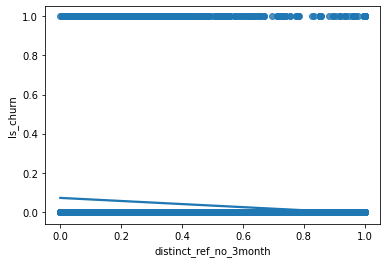

In [30]:
sns.regplot(x = 'distinct_ref_no_3month', y = 'Is_churn', data = data)

In [43]:
pearson_coef, p_value = stats.pearsonr(data['distinct_ref_no_3month'], data['Is_churn'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is -0.1112584171607214  with a P-value of P = 1.9931790157162314e-150


<AxesSubplot:xlabel='Is_churn', ylabel='distinct_ref_no_3month'>

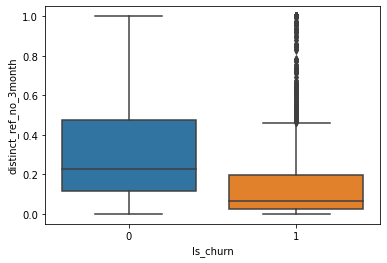

In [47]:
sns.boxplot(x = 'Is_churn', y = 'distinct_ref_no_3month', data = data)

In [52]:
data_churn = data[data['Is_churn'] == 1]
data_active = data[data['Is_churn'] == 0]

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


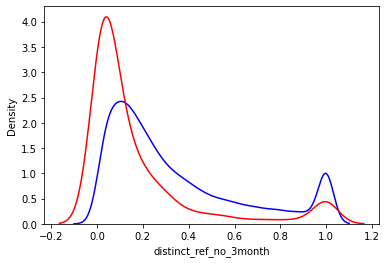

In [53]:
ax1 = sns.distplot(data_active['distinct_ref_no_3month'], hist = False, color = 'b', label = 'Active Customer')
sns.distplot(data_churn['distinct_ref_no_3month'], hist = False, color = 'r', label = 'Churn Customer', ax = ax1)
plt.show()

In [55]:
data_churn['distinct_ref_no_3month'].mode()

0    0.018127
dtype: float64

<h5>Looking at the chart above, we see that when the values ​​of the 'distinct_ref_no_3month' column increase from the min value to 0.018, customers tend to churn. However, when the value of the column 'distinct_ref_no_3month' continued to increase from 0.018, the number of active customers greatly increased.</h5>

<AxesSubplot:xlabel='distinct_ref_no_month', ylabel='Is_churn'>

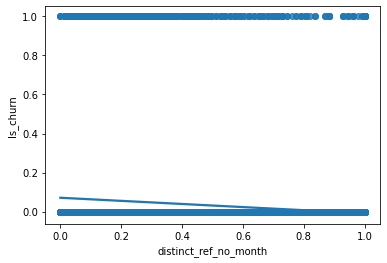

In [31]:
sns.regplot(x = 'distinct_ref_no_month', y = 'Is_churn', data = data)

In [66]:
pearson_coef, p_value = stats.pearsonr(data['distinct_ref_no_month'], data['Is_churn'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is -0.11073004109120035  with a P-value of P = 5.181560041986308e-149


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


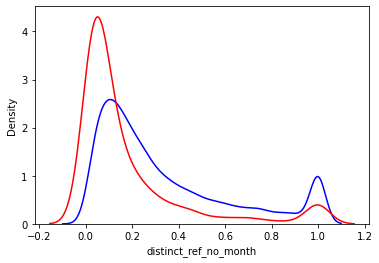

In [67]:
ax1 = sns.distplot(data_active['distinct_ref_no_month'], hist = False, color = 'b', label = 'Active Customer')
sns.distplot(data_churn['distinct_ref_no_month'], hist = False, color = 'r', label = 'Churn Customer', ax = ax1)
plt.show()

In [68]:
data_churn['distinct_ref_no_month'].mode()

0    0.015504
dtype: float64

<h5> Similar to the trend histogram of column 'distinct_ref_no_3month', customers tend to be churn as values ​​in column 'distinct_ref_no_month' increase from min value to 0.015. <h5>

<AxesSubplot:xlabel='trans_group_3month_1', ylabel='Is_churn'>

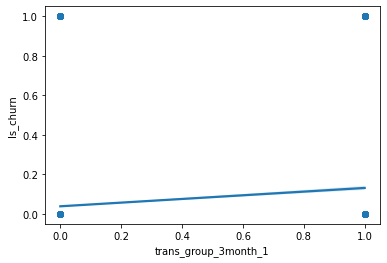

In [32]:
sns.regplot(x = 'trans_group_3month_1', y = 'Is_churn', data = data)

In [69]:
pearson_coef, p_value = stats.pearsonr(data['trans_group_3month_1'], data['Is_churn'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.1139511277279152  with a P-value of P = 9.590803113555227e-158


<AxesSubplot:xlabel='Is_churn', ylabel='count'>

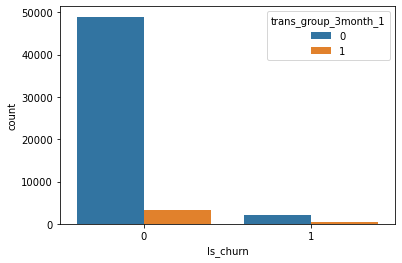

In [70]:
sns.countplot(x = 'Is_churn', hue = 'trans_group_3month_1', data = data)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


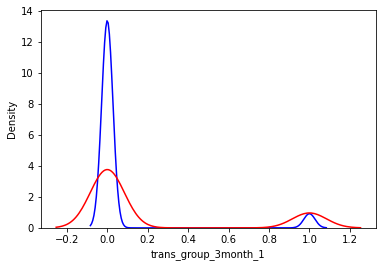

In [88]:
ax1 = sns.distplot(data_active['trans_group_3month_1'], hist = False, color = 'b', label = 'Active Customer')
sns.distplot(data_churn['trans_group_3month_1'], hist = False, color = 'r', label = 'Churn Customer', ax = ax1)
plt.show()

<AxesSubplot:xlabel='diff_amount_3month', ylabel='Is_churn'>

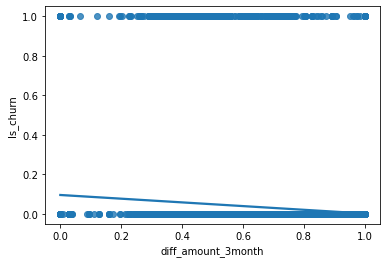

In [33]:
sns.regplot(x = 'diff_amount_3month', y = 'Is_churn', data = data)

In [71]:
pearson_coef, p_value = stats.pearsonr(data['diff_amount_3month'], data['Is_churn'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is -0.10133491058661133  with a P-value of P = 5.325451515613173e-125


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


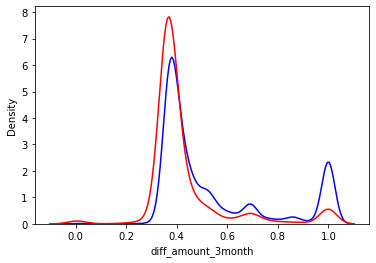

In [72]:
ax1 = sns.distplot(data_active['diff_amount_3month'], hist = False, color = 'b', label = 'Active Customer')
sns.distplot(data_churn['diff_amount_3month'], hist = False, color = 'r', label = 'Churn Customer', ax = ax1)
plt.show()

<h5> We discover that the number of customers leaving tends to increase sharply if the difference between their transactions in the previous 3 months is between 0.2 and 0.4. </h5>

<AxesSubplot:xlabel='diff_amount_week', ylabel='Is_churn'>

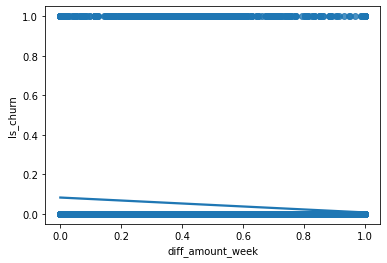

In [34]:
sns.regplot(x = 'diff_amount_week', y = 'Is_churn', data = data)

In [73]:
pearson_coef, p_value = stats.pearsonr(data['diff_amount_week'], data['Is_churn'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is -0.09980643760480298  with a P-value of P = 2.6787426765183777e-121


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


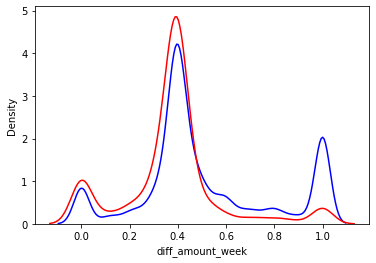

In [74]:
ax1 = sns.distplot(data_active['diff_amount_week'], hist = False, color = 'b', label = 'Active Customer')
sns.distplot(data_churn['diff_amount_week'], hist = False, color = 'r', label = 'Churn Customer', ax = ax1)
plt.show()

<h5>In this column, we see that when the difference in customer transactions within the previous 1 week increases from min value to 0.4, both customer churn and active tend to increase sharply. However, at this range of values, the difference between the number of churn customers and the active customers is small. However, at the '1' value of the 'diff_amount_week' column, we see that customers tend to be active rather than churn.</h5>

<AxesSubplot:xlabel='diff_amount_month', ylabel='Is_churn'>

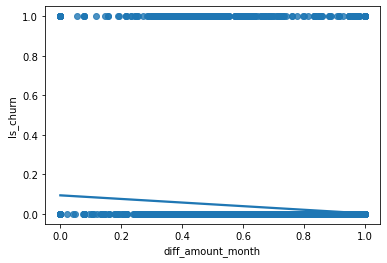

In [35]:
sns.regplot(x = 'diff_amount_month', y = 'Is_churn', data = data)

In [75]:
pearson_coef, p_value = stats.pearsonr(data['diff_amount_month'], data['Is_churn'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is -0.09931458993141819  with a P-value of P = 4.044818517920034e-120


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


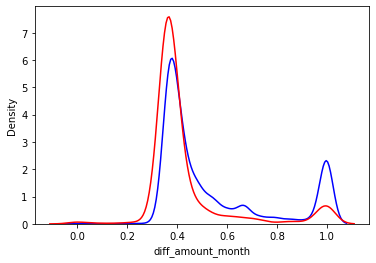

In [76]:
ax1 = sns.distplot(data_active['diff_amount_month'], hist = False, color = 'b', label = 'Active Customer')
sns.distplot(data_churn['diff_amount_month'], hist = False, color = 'r', label = 'Churn Customer', ax = ax1)
plt.show()

<AxesSubplot:xlabel='trans_group_month_1.0', ylabel='Is_churn'>

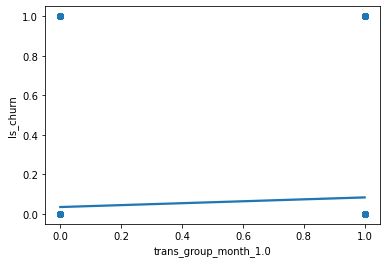

In [36]:
sns.regplot(x = 'trans_group_month_1.0', y = 'Is_churn', data = data)

In [77]:
pearson_coef, p_value = stats.pearsonr(data['trans_group_month_1.0'], data['Is_churn'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.09521533916819501  with a P-value of P = 1.595233240238524e-110


<AxesSubplot:xlabel='Is_churn', ylabel='count'>

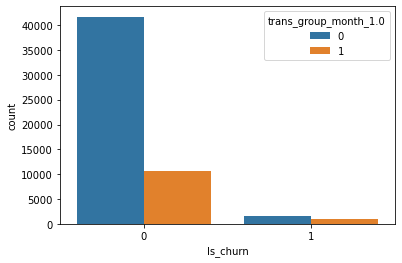

In [78]:
sns.countplot(x = 'Is_churn', hue = 'trans_group_month_1.0', data = data)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


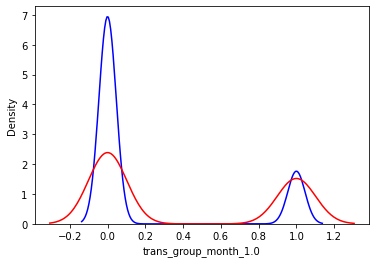

In [87]:
ax1 = sns.distplot(data_active['trans_group_month_1.0'], hist = False, color = 'b', label = 'Active Customer')
sns.distplot(data_churn['trans_group_month_1.0'], hist = False, color = 'r', label = 'Churn Customer', ax = ax1)
plt.show()

<AxesSubplot:xlabel='amount_3month', ylabel='Is_churn'>

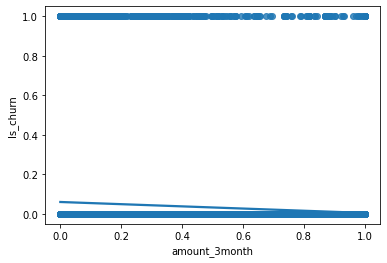

In [37]:
sns.regplot(x = 'amount_3month', y = 'Is_churn', data = data)

In [79]:
pearson_coef, p_value = stats.pearsonr(data['amount_3month'], data['Is_churn'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is -0.09312640836282732  with a P-value of P = 8.609948157806502e-106


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


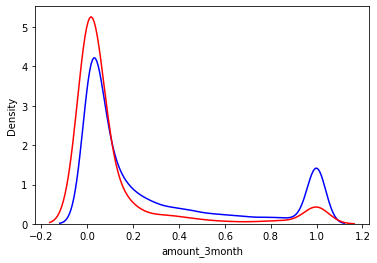

In [80]:
ax1 = sns.distplot(data_active['amount_3month'], hist = False, color = 'b', label = 'Active Customer')
sns.distplot(data_churn['amount_3month'], hist = False, color = 'r', label = 'Churn Customer', ax = ax1)
plt.show()

<AxesSubplot:xlabel='distinct_ref_no_week', ylabel='Is_churn'>

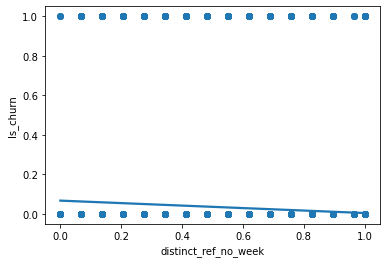

In [38]:
sns.regplot(x = 'distinct_ref_no_week', y = 'Is_churn', data = data)

In [81]:
pearson_coef, p_value = stats.pearsonr(data['distinct_ref_no_week'], data['Is_churn'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is -0.09233381831622933  with a P-value of P = 5.0426803002158404e-104


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


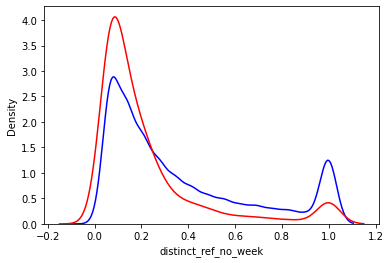

In [82]:
ax1 = sns.distplot(data_active['distinct_ref_no_week'], hist = False, color = 'b', label = 'Active Customer')
sns.distplot(data_churn['distinct_ref_no_week'], hist = False, color = 'r', label = 'Churn Customer', ax = ax1)
plt.show()

<AxesSubplot:xlabel='amount_month', ylabel='Is_churn'>

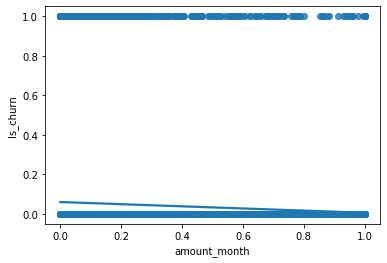

In [39]:
sns.regplot(x = 'amount_month', y = 'Is_churn', data = data)

In [83]:
pearson_coef, p_value = stats.pearsonr(data['amount_month'], data['Is_churn'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is -0.0918946339930701  with a P-value of P = 4.73756489664431e-103


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


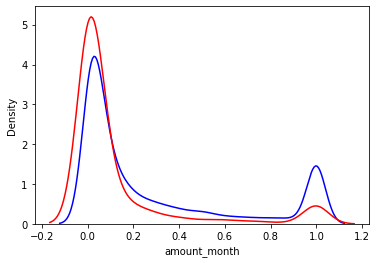

In [84]:
ax1 = sns.distplot(data_active['amount_month'], hist = False, color = 'b', label = 'Active Customer')
sns.distplot(data_churn['amount_month'], hist = False, color = 'r', label = 'Churn Customer', ax = ax1)
plt.show()

<AxesSubplot:xlabel='max_amount_3month', ylabel='Is_churn'>

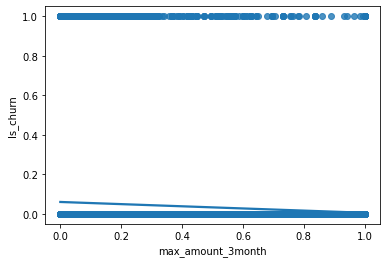

In [40]:
sns.regplot(x = 'max_amount_3month', y = 'Is_churn', data = data)

In [85]:
pearson_coef, p_value = stats.pearsonr(data['max_amount_3month'], data['Is_churn'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is -0.09160221258491975  with a P-value of P = 2.092811980434715e-102


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


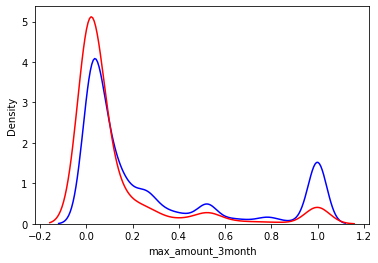

In [86]:
ax1 = sns.distplot(data_active['max_amount_3month'], hist = False, color = 'b', label = 'Active Customer')
sns.distplot(data_churn['max_amount_3month'], hist = False, color = 'r', label = 'Churn Customer', ax = ax1)
plt.show()